# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df=pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# What does each column mean?
df.info()
'''
1) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
2) REGION: customer Region isnon, Oporto or Other (Nominal)
3) FRESH: annual spending (m.u.) on fresh products (Continuous);
4) MILK: annual spending (m.u.) on milk products (Continuous);
5) GROCERY: annual spending (m.u.)on grocery products (Continuous);
6) FROZEN: annual spending (m.u.)on frozen products (Continuous)
7) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
8) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


'\n1) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n2) REGION: customer Region isnon, Oporto or Other (Nominal)\n3) FRESH: annual spending (m.u.) on fresh products (Continuous);\n4) MILK: annual spending (m.u.) on milk products (Continuous);\n5) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n6) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n7) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n8) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n'

In [4]:
#Any categorical data to convert? => NO


In [5]:
df.isna().sum() 
#Any missing data to remove? => NO

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

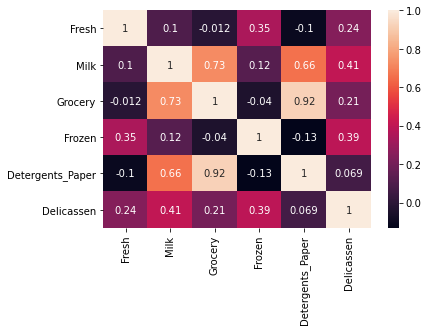

In [6]:
#Column collinearity - any high correlations? => SI. Hay coliniaridad entre Detergents_Paper & Grocery (0.92)
sns.heatmap(df.iloc[:,2:].corr(),annot=True)

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df[filtered_entries] #df sin outliers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
#Outliers de columna Fresh
#q_low = df["Fresh"].quantile(0.01)
#q_hi  = df["Fresh"].quantile(0.99)
#df[(df["Fresh"] > q_hi)|(df["Fresh"] < q_low)]
#df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)] <= para eliminar outlier del dataset

In [10]:
#Column-wise data distribution - is the distribution skewed?
#sns.kdeplot(df['Grocery'])
df.skew(axis = 0, skipna = True) 
#En todas las variables númericas (No Channel y No Region) the distribution is highly positive skewed => Por tanto se deberian usar métodos estadísticos NO paramétricos

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

<AxesSubplot:xlabel='Fresh', ylabel='Density'>

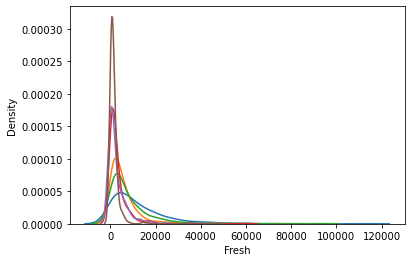

In [11]:
sns.kdeplot(df['Fresh'])
sns.kdeplot(df['Milk'])
sns.kdeplot(df['Grocery'])
sns.kdeplot(df['Frozen'])
sns.kdeplot(df['Detergents_Paper'])
sns.kdeplot(df['Delicassen'])

In [12]:

from ipywidgets import interact

import ipywidgets as widgets


@interact(element=df.columns.tolist()[2:])
def probability_plot(element):
     dat, reg = stats.probplot(df[element], dist="norm", plot=plt)
         


interactive(children=(Dropdown(description='element', options=('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergen…

<AxesSubplot:>

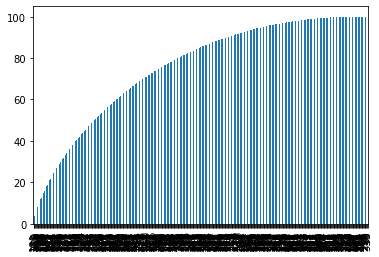

In [13]:
# Gráfico de Pareto
df = df.sort_values(by='Fresh', ascending=False)
df['cumperc'] = df['Fresh'].cumsum()/df['Fresh'].sum()*100
df['cumperc'].plot.bar()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [14]:
#usamos el método de VIF para eliminar la coliniaridad
from statsmodels.stats.outliers_influence import variance_inflation_factor

#statsmodels nos obliga que añadamos el intercept en la relación lineal:
def vif(df):
    return pd.Series(np.linalg.inv(df.corr().values).diagonal(),
           index=df.columns)

In [15]:
#eliminamos la variable "Grocery" porque puedes ser predecida por otra VIF > 4
X = sm.add_constant(df.iloc[:,2:])
vif(df.iloc[:,2:].drop(['Grocery'],axis=1))
df=df.drop(['Grocery'],axis=1)

In [16]:
#eliminamos los outliers de todo el dataframe
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [17]:
df=new_df

In [18]:
# Your comment here 
#Se ha elimnado columna que generaba coliniaridad y se han sacad los valores extremos de todo el df

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [19]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
sc=StandardScaler()
df1=df.iloc[:,0:2].reset_index().rename(columns={"index":"old_index"})
df2=pd.DataFrame(sc.fit_transform(df.iloc[:,2:]),columns=df.columns.tolist()[2:])
customers_scale=df1.join(df2)

In [20]:
customers_scale

,old_index,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cumperc
0,282,1,3,3.913912,-0.204147,1.176460,-0.418648,0.137819,-2.874873
1,239,1,1,3.753769,-0.509327,0.926801,-0.484276,0.836713,-2.836619
2,176,1,3,3.564759,0.449218,1.656548,-0.267364,-0.828614,-2.799857
3,29,1,3,3.304450,-0.611272,-0.461607,-0.398312,-0.340458,-2.694485
4,289,1,3,3.273645,-1.007264,-0.397046,-0.729535,-0.999839,-2.660022
...,...,...,...,...,...,...,...,...,...
410,96,2,3,-1.088264,-0.498631,-0.823905,0.454240,-0.839315,0.952876
411,218,2,1,-1.088774,0.568408,-0.432417,0.738629,4.227459,0.952891
412,66,1,3,-1.089692,-0.734829,-0.813603,0.329145,-0.995723,0.952898
413,95,1,3,-1.090304,-0.432268,-0.722599,-0.670685,-0.434303,0.952900


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
# Your code here:
from sklearn import cluster
inertia=[]
for k in range(2,11):
    model=cluster.KMeans(k)
    model.fit(df2)
    inertia.append(model.inertia_)

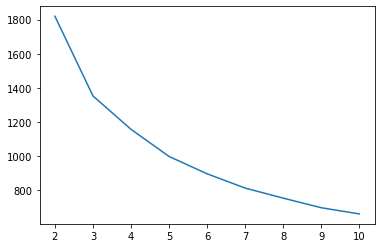

In [22]:
plt.plot(range(2,11),inertia) #consideramos 8 clusters

In [23]:
model=cluster.KMeans(8)
customers_scale['labels']=model.fit(df2).labels_

Count the values in `labels`.

In [24]:
# Your code here:
customers_scale.groupby("labels").count()

,old_index,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cumperc
labels,,,,,,,,,
0,36,36,36,36,36,36,36,36,36
1,128,128,128,128,128,128,128,128,128
2,76,76,76,76,76,76,76,76,76
3,18,18,18,18,18,18,18,18,18
4,74,74,74,74,74,74,74,74,74
5,20,20,20,20,20,20,20,20,20
6,28,28,28,28,28,28,28,28,28
7,35,35,35,35,35,35,35,35,35


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [25]:
# Your code here
model= cluster.DBSCAN(eps=0.5)
customers_scale['labels_DBSCAN']=model.fit(df2).labels_

Count the values in `labels_DBSCAN`.

In [26]:
# Your code here
customers_scale.groupby("labels_DBSCAN").count()

,old_index,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cumperc,labels
labels_DBSCAN,,,,,,,,,,
-1,275,275,275,275,275,275,275,275,275,275
0,14,14,14,14,14,14,14,14,14,14
1,121,121,121,121,121,121,121,121,121,121
2,5,5,5,5,5,5,5,5,5,5


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [27]:
customers_scale["Detergents_Paper"]

0     -0.418648
1     -0.484276
2     -0.267364
3     -0.398312
4     -0.729535
         ...   
410    0.454240
411    0.738629
412    0.329145
413   -0.670685
414   -0.734773
Name: Detergents_Paper, Length: 415, dtype: float64

Text(0.5, 1.0, 'DBSCAN')

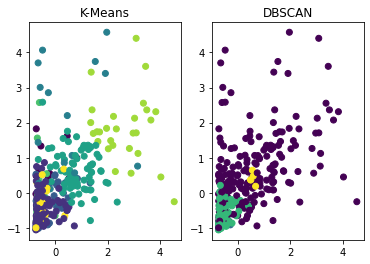

In [28]:
# Your code here:
plt.subplot(1, 2, 1)
plt.scatter(customers_scale["Detergents_Paper"],customers_scale["Milk"],c=customers_scale["labels"])
plt.title("K-Means")
plt.subplot(1, 2, 2)
plt.scatter(customers_scale["Detergents_Paper"],customers_scale["Milk"],c=customers_scale["labels_DBSCAN"])
plt.title("DBSCAN")
#Mejor K-means

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

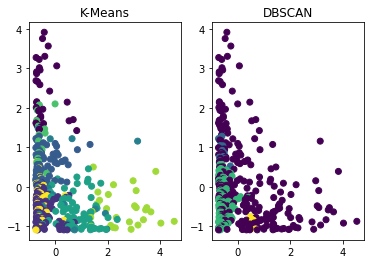

In [29]:
# Your code here:
plt.subplot(1, 2, 1)
plt.scatter(customers_scale["Detergents_Paper"],customers_scale["Fresh"],c=customers_scale["labels"])
plt.title("K-Means")
plt.subplot(1, 2, 2)
plt.scatter(customers_scale["Detergents_Paper"],customers_scale["Fresh"],c=customers_scale["labels_DBSCAN"])
plt.title("DBSCAN")
#Mejor K-means

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

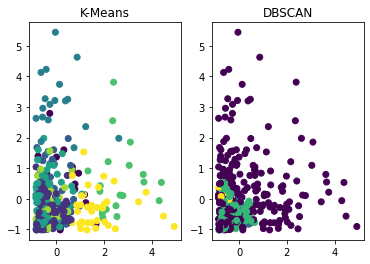

In [30]:
# Your code here:
plt.subplot(1, 2, 1)
plt.scatter(customers_scale["Frozen"],customers_scale["Delicassen"],c=customers_scale["labels"])
plt.title("K-Means")
plt.subplot(1, 2, 2)
plt.scatter(customers_scale["Frozen"],customers_scale["Delicassen"],c=customers_scale["labels_DBSCAN"])
plt.title("DBSCAN")
#Mejor K-means

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [31]:
customers_scale.iloc[:,2:-1].groupby("labels").mean()

,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cumperc
labels,,,,,,,
0,2.638889,2.311430,-0.136802,-0.038192,-0.437134,0.150441,-2.179918
1,2.570312,-0.587508,-0.553459,-0.403509,-0.506231,-0.484338,0.627385
2,2.500000,0.607792,-0.474512,-0.255679,-0.391323,-0.013216,-0.743426
3,2.500000,-0.194285,1.763843,0.080733,0.328529,3.159407,0.171295
4,2.608108,-0.626261,0.644090,-0.464369,0.831642,0.031782,0.648096
5,2.800000,1.095032,-0.051885,2.619694,-0.564386,0.575842,-1.243816
6,2.392857,-0.541256,1.819948,-0.311586,2.606900,-0.106906,0.568976
7,2.314286,-0.317362,-0.500059,1.762750,-0.539587,-0.290314,0.359279


In [32]:
# Your code here:
customers_scale.iloc[:,2:].drop(['labels'],axis=1).groupby("labels_DBSCAN").mean()

,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cumperc
labels_DBSCAN,,,,,,,
-1,2.541818,0.157503,0.328149,0.172760,0.276835,0.242365,-0.160116
0,2.428571,0.897488,-0.785583,0.044899,-0.604286,-0.437948,-1.099114
1,2.578512,-0.426181,-0.671806,-0.372477,-0.582353,-0.508370,0.454678
2,2.200000,-0.862064,0.409138,-0.613601,0.558998,0.198735,0.880705


Which algorithm appears to perform better?

In [33]:
# Your observations here
#K-means porque DBSAN deja fuera muchos valores que considera outliers (-1)

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [34]:
@interact(k=(2,20),
         x=customers_scale.columns[3:-2],
         y=customers_scale.columns[3:-2])
def explore_kmeans(k,x,y):
    model=cluster.KMeans(k)
    customers_scale['labels']=model.fit(df2).labels_
    display(plt.scatter(customers_scale[x],customers_scale[y],c=customers_scale["labels"]))

interactive(children=(IntSlider(value=11, description='k', max=20, min=2), Dropdown(description='x', options=(…

In [35]:
# Your comment here
# 3 CLUSTERS

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [36]:
@interact(eps=widgets.FloatSlider(
    value=0.5,
    min=0.1,
    max=10.0,
    step=0.1,
    description='eps:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
),
          min_smp=(2,10),
         x=customers_scale.columns[3:-2],
         y=customers_scale.columns[3:-2])
def explore_dbscan(eps,min_smp,x,y):
    model= cluster.DBSCAN(eps=eps, min_samples=min_smp)
    customers_scale['labels_DBSCAN']=model.fit(df2).labels_
    display(plt.scatter(customers_scale[x],customers_scale[y],c=customers_scale["labels_DBSCAN"]))

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='eps:', max=10.0, min=0.1, r…

In [37]:
# Your comment here